In [1]:
# importing the libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# importing our data from the site 
cols = ['Sepal length','Sepal width','Petal lengh','Petal width','Class']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,
                names=cols)

df

,Sepal length,Sepal width,Petal lengh,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,Sepal length,Sepal width,Petal lengh,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


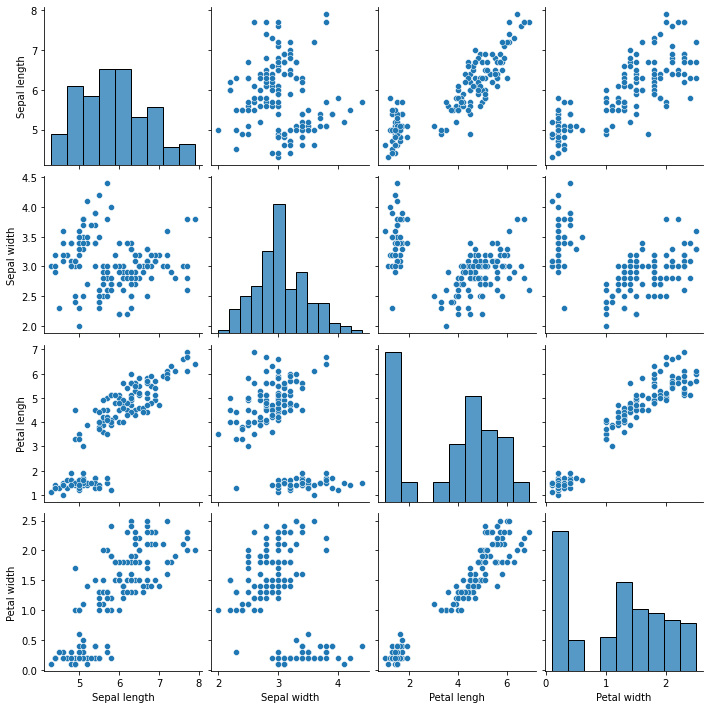

In [4]:
sns.pairplot(df)

#### As we seen in the upper visual we are see only two classes are there but its actually three lets confirm by our next function 

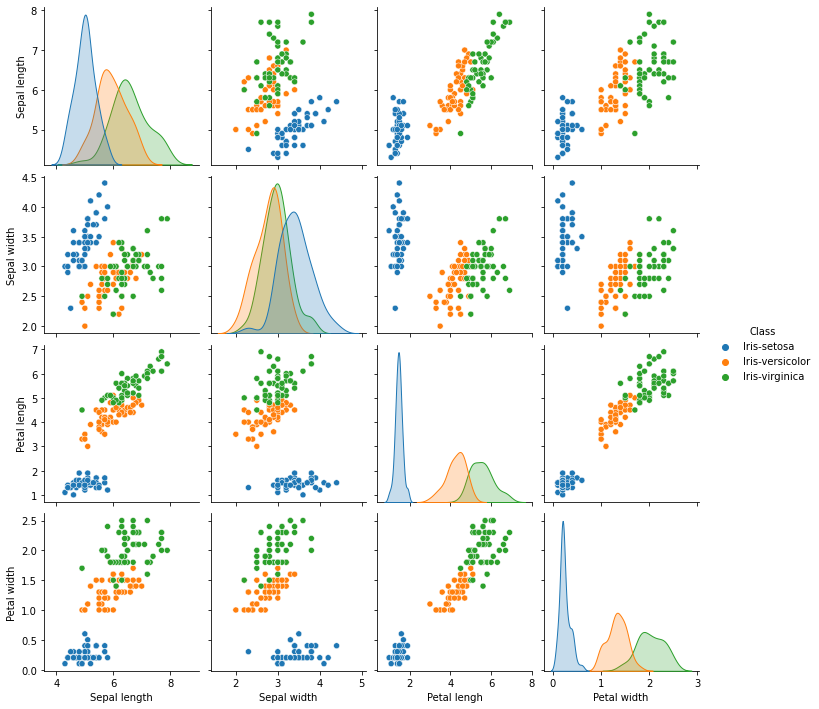

In [5]:
sns.pairplot(df,hue='Class')

#### So we confirm that there are 3 classes by this visual  but they are overlapping to each other thats why they are not seen in previous function 

In [6]:
# encoding 

from sklearn.preprocessing import LabelEncoder

In [7]:
LE = LabelEncoder()

df['Class']=LE.fit_transform(df['Class'])

In [8]:
df['Class'].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

In [9]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split

In [10]:
x = df.iloc[:,:-1]
y = df['Class']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

# Model Building

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC()

svc.fit(xtrain,ytrain)

ypred = svc.predict(xtest)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [16]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.9732142857142857
0.9736842105263158


# Hyperparameter Tuning 

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params = {
         'C': [1.0,1,5,4,6,45,12],
        'kernel' : ['linear', 'poly', 'rbf'],
        'gamma' :  [1.0,2,6,8,4,9]
}

In [19]:
grid = GridSearchCV(SVC(), param_grid= params)

In [20]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 1, 5, 4, 6, 45, 12],
                         'gamma': [1.0, 2, 6, 8, 4, 9],
                         'kernel': ['linear', 'poly', 'rbf']})

In [21]:
grid.best_params_

{'C': 1.0, 'gamma': 1.0, 'kernel': 'linear'}

### After tuning the model getting the best parameter 

#  Final Model

In [22]:
svc = SVC(C=1.0,gamma=1.0,kernel='linear')

svc.fit(xtrain,ytrain)

ypred = svc.predict(xtest)

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [24]:
print("Training Accuracy is ",svc.score(xtrain,ytrain))
print("Templates/esting accuracy is ",svc.score(xtest,ytest))

Training Accuracy is  0.9821428571428571
Templates/esting accuracy is  1.0
